## statsmodel package
- 검정 및 추정
- 회귀분석
- 시계열분석

In [1]:
!pip3 install statsmodels

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 8.7 MB 464 kB/s eta 0:00:01
     |████████████████████████████████| 10.1 MB 952 kB/s eta 0:00:01
     |████████████████████████████████| 231 kB 1.1 MB/s eta 0:00:01


#### get_rdataset(item, [package="datasets"])

item과 package 인수로 해당 데이터의 "Package"이름과 "Item"을 넣는다. "Package"이름이 datasets인 경우에는 생략할 수 있다. 이 함수는 인터넷에서 데이터를 다운로드 받으므로 인터넷에 연결되어 있어야 한다. 이렇게 받은 데이터는 다음과 같은 속성을 가지고 있다.

- package: 데이터를 제공하는 R 패키지 이름
- title: 데이터 이름 문자열
- data: 데이터를 담고 있는 데이터프레임
- __doc__: 데이터에 대한 설명 문자열. 이 설명은 R 패키지의 내용을 그대로 가져온 것이므로 예제 코드가 R로 되어 있어 파이썬에서는 사용할 수 없다.
- get_rdataset 명령으로 받을 수 있는 몇가지 예제 데이터를 소개한다.

- ex1

In [3]:
import statsmodels.api as sm

In [4]:
data = sm.datasets.get_rdataset("Titanic", package="datasets")

In [7]:
df = data.data
df.tail()

,Class,Sex,Age,Survived,Freq
27,Crew,Male,Adult,Yes,192
28,1st,Female,Adult,Yes,140
29,2nd,Female,Adult,Yes,80
30,3rd,Female,Adult,Yes,76
31,Crew,Female,Adult,Yes,20


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Class     32 non-null     object
 1   Sex       32 non-null     object
 2   Age       32 non-null     object
 3   Survived  32 non-null     object
 4   Freq      32 non-null     int64 
dtypes: int64(1), object(4)
memory usage: 1.4+ KB


In [11]:
print(data.__doc__)

======= ===============
Titanic R Documentation
======= ===============

Survival of passengers on the Titanic
-------------------------------------

Description
~~~~~~~~~~~

This data set provides information on the fate of passengers on the
fatal maiden voyage of the ocean liner ‘Titanic’, summarized according
to economic status (class), sex, age and survival.

Usage
~~~~~

::

   Titanic

Format
~~~~~~

A 4-dimensional array resulting from cross-tabulating 2201 observations
on 4 variables. The variables and their levels are as follows:

== ======== ===================
No Name     Levels
1  Class    1st, 2nd, 3rd, Crew
2  Sex      Male, Female
3  Age      Child, Adult
4  Survived No, Yes
== ======== ===================

Details
~~~~~~~

The sinking of the Titanic is a famous event, and new books are still
being published about it. Many well-known facts—from the proportions of
first-class passengers to the ‘women and children first’ policy, and the
fact that that policy was not entire

ex2) 1974년부터 1979년까지의 영국의 호흡기 질환 사망자 수를 나타내는 시계열 데이터

In [12]:
data = sm.datasets.get_rdataset("deaths","MASS")

In [13]:
df = data.data

In [14]:
df.tail()

,time,value
67,1979.583333,1354
68,1979.666667,1333
69,1979.750000,1492
70,1979.833333,1781
71,1979.916667,1915


In [21]:
def yearfraction2datetime(yearfraction, startyear=0):
    import datetime
    import dateutil
    year = int(yearfraction) + startyear
    month = int(round(12 * (yearfraction - year)))
    delta = dateutil.relativedelta.relativedelta(months=month)
    date = datetime.datetime(year, 1, 1) + delta
    return date

In [22]:
df['datetime'] = df.time.map(yearfraction2datetime)
df.tail()

,time,value,datetime
67,1979.583333,1354,1979-08-01
68,1979.666667,1333,1979-09-01
69,1979.750000,1492,1979-10-01
70,1979.833333,1781,1979-11-01
71,1979.916667,1915,1979-12-01


In [24]:
import matplotlib.pyplot as plt

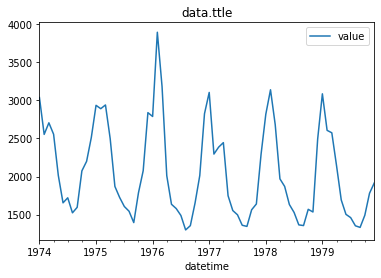

In [25]:
df.plot(x="datetime",y="value")
plt.title("data.ttle")
plt.show()

# 패턴, 계절성을 보이는 시계열

In [28]:
!pip3 install scikit-learn

Defaulting to user installation because normal site-packages is not writeable


## scikit-learn 에서 제공하는 데이터

sklearn.datasets 서브패키지는 다양한 예제 데이터셋을 제공한다. 데이터를 불러오는 명령들은 크게 다음과 같이 세가지 계열의 명령으로 나눌 수 있다.

- load 계열 명령: scikit-learn 설치 패키지에 같이 포함된 데이터를 가져오는 명령
- fetch 계열 명령: 인터넷에서 다운로드할 수 있는 데이터를 가져오는 명령
- make 계열 명령: 무작위로 가상의 데이터를 생성하는 명령
- load 계열의 명령들은 설치 패키지에 처음부터 저장되어 있어서 별로도 다운로드 받지 않아도 바로 쓸 수 있는 데이터를 제공한다.

    - load_boston: 회귀 분석용 보스턴 집값
    - load_diabetes: 회귀 분석용 당뇨병 자료
    - load_linnerud: 회귀 분석용 linnerud 자료
    - load_iris: 분류용 붓꽃(iris) 자료
    - load_digits: 분류용 숫자(digit) 필기 이미지 자료
    - load_wine: 분류용 포도주(wine) 등급 자료
    - load_breast_cancer: 분류용 유방암(breast cancer) 진단 자료
- fetch 계열의 명령들은 데이터의 크기가 커서 패키지에 처음부터 저장되어 있지 않고 인터넷에서 다운로드 받아 홈 디렉토리 아래의 scikit_learn_data 라는 서브 디렉토리에 저장한 후 추후 불러들이는 데이터들이다. 따라서 최초 사용시에 인터넷에 연결되어 있지 않으면 사용할 수 없다.

    - fetch_california_housing: : 회귀분석용 캘리포니아 집값 자료
    - fetch_covtype : 회귀분석용 토지 조사 자료
    - fetch_20newsgroups : 뉴스 그룹 텍스트 자료
    - fetch_olivetti_faces : 얼굴 이미지 자료
    - fetch_lfw_people : 유명인 얼굴 이미지 자료
    - fetch_lfw_pairs : 유명인 얼굴 이미지 자료
    - fetch_rcv1 : 로이터 뉴스 말뭉치
    - fetch_kddcup99 : Kddcup 99 Tcp dump 자료
- 경우에 따라서는 모형을 시험하기 위해 원하는 특성을 가진 가상의 데이터가 필요할 수 있다. make 계열 명령은 이러한 가상 데이터를 생성하는 역할을 한다.

    - make_regression: 회귀 분석용 가상 데이터 생성
    - make_classification: 분류용 가상 데이터 생성
    - make_blobs: 클러스터링용 가상 데이터 생성

이 외에도 다양한 가상 데이터 생성 명령이 있다.

- scikit-learn에서 제공하는 데이터셋은 Bunch 라는 클래스 객체 형식으로 생성된다. 이 클래스 객체는 다음과 같은 속성을 가진다.

- data: (필수) 독립 변수 ndarray 배열
- target: (필수) 종속 변수 ndarray 배열
- feature_names: (옵션) 독립 변수 이름 리스트
- target_names: (옵션) 종속 변수 이름 리스트
- DESCR: (옵션) 자료에 대한 설명

ex3) load_boston -> 보스턴 주택 가격 데이터

* 타겟 데이터
    - 1978년 보스턴 주택 가격
    - 506개 타운의 주택 가격 중앙값 (단위 1,000 달러)
* 특징 데이터
    - CRIM: 범죄율
    - INDUS: 비소매상업지역 면적 비율
    - NOX: 일산화질소 농도
    - RM: 주택당 방 수
    - LSTAT: 인구 중 하위 계층 비율
    - B: 인구 중 흑인 비율
    - PTRATIO: 학생/교사 비율
    - ZN: 25,000 평방피트를 초과 거주지역 비율
    - CHAS: 찰스강의 경계에 위치한 경우는 1, 아니면 0
    - AGE: 1940년 이전에 건축된 주택의 비율
    - RAD: 방사형 고속도로까지의 거리
    - DIS: 직업센터의 거리
    - TAX: 재산세율

In [31]:
from sklearn.datasets import load_boston

boston = load_boston()
print(boston.DESCR[:1200])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [33]:
import pandas as pd

In [34]:
dfX = pd.DataFrame(boston.data, columns=boston.feature_names)
dfy = pd.DataFrame(boston.target, columns=["MEDV"])

In [35]:
df = pd.concat([dfX,dfy],axis = 1)
df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


## 가상데이터

- 때로는 회귀분석 결과를 검증하기 위해 가상의 데이터가 필요한 경우가 있다. 이 때는 make_regression() 명령을 사용한다. 사용법은 다음과 같다.

In [36]:
from sklearn.datasets import make_regression

X, y = make_regression(n_samples, n_features, bias, noise, random_state)

X, y, w = make_regression(... coef=True)

- n_samples : 정수 (옵션, 디폴트 100)
    - 표본 데이터의 갯수  N 
- n_features : 정수 (옵션, 디폴트 100)
    - 독립 변수(feature)의 수(차원)  M 
- bias : 실수 (옵션, 디폴트 0.0)
    - y 절편
- noise : 실수 (옵션, 디폴트 0.0)
    - 출력 즉, 종속 변수에 더해지는 잡음  ϵ 의 표준편차
- random_state : 정수 (옵션, 디폴트 None)
    - 난수 발생용 시드값
- coef : 불리언 (옵션, 디폴트 False)
    - True 이면 선형 모형의 계수도 출력

출력은 다음과 같다.

- X : [n_samples, n_features] 형상의 2차원 배열
    - 독립 변수의 표본 데이터 행렬  X 
- y : [n_samples] 형상의 1차원 배열
    - 종속 변수의 표본 데이터 벡터  y 
- coef : [n_features] 형상의 1차원 배열 또는 [n_features, n_targets] 형상의 2차원 배열 (옵션)
    - 선형 모형의 계수 벡터  w , 입력 인수 coef가 True 인 경우에만 출력됨

make_regression() 명령은 내부적으로 다음 과정을 거쳐 가상의 데이터를 만든다.
- 독립변수 데이터 행렬 X를 무작위로 만든다.
- 종속변수와 독립변수를 연결하는 가중치 벡터 w를 무작위로 만든다.
- X와 w를 내적하고 y절편 b 값을 더하여 독립변수와 완전선형인 종속변수 벡터 y_0를 만든다.
- 기댓값이 0이고 표준편차가 noise인 정규분포를 이용하여 잡음 epsilon를 만든다.
- 독립변수와 완전선형인 종속변수 벡터 y_0에 잡음 epsilon을 더해서 종속변수 데이터  y 를 만든다.

ex4) 다음은 독립 변수가 1개이고 noise 인수값이 0이므로 잡음이 없는 경우의 가상데이터다.

In [41]:
from sklearn.datasets import make_regression
import numpy as np

In [44]:
X,y,w = make_regression(n_samples=50, n_features=1, bias=100, coef=True, random_state=0)

print("w:\n", w)

w:
 15.896958364551972


In [45]:
xx = np.linspace(-3, 3, 100)
xx

array([-3.        , -2.93939394, -2.87878788, -2.81818182, -2.75757576,
       -2.6969697 , -2.63636364, -2.57575758, -2.51515152, -2.45454545,
       -2.39393939, -2.33333333, -2.27272727, -2.21212121, -2.15151515,
       -2.09090909, -2.03030303, -1.96969697, -1.90909091, -1.84848485,
       -1.78787879, -1.72727273, -1.66666667, -1.60606061, -1.54545455,
       -1.48484848, -1.42424242, -1.36363636, -1.3030303 , -1.24242424,
       -1.18181818, -1.12121212, -1.06060606, -1.        , -0.93939394,
       -0.87878788, -0.81818182, -0.75757576, -0.6969697 , -0.63636364,
       -0.57575758, -0.51515152, -0.45454545, -0.39393939, -0.33333333,
       -0.27272727, -0.21212121, -0.15151515, -0.09090909, -0.03030303,
        0.03030303,  0.09090909,  0.15151515,  0.21212121,  0.27272727,
        0.33333333,  0.39393939,  0.45454545,  0.51515152,  0.57575758,
        0.63636364,  0.6969697 ,  0.75757576,  0.81818182,  0.87878788,
        0.93939394,  1.        ,  1.06060606,  1.12121212,  1.18

In [46]:
y0 = w*xx + 100

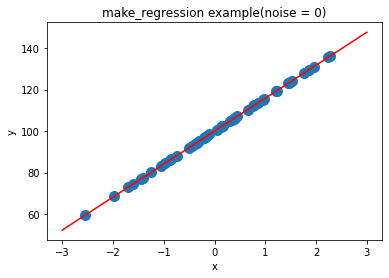

In [47]:
plt.plot(xx, y0, "r-")
plt.scatter(X,y,s=100)
plt.xlabel("x")
plt.ylabel('y')
plt.title("make_regression example(noise = 0)")
plt.show()

ex5) noise 가 10일때

In [48]:
X,y,w = make_regression(n_samples=50, n_features=1, bias=100, noise= 10, coef=True, random_state=0)

print("w:\n", w)

w:
 15.896958364551972


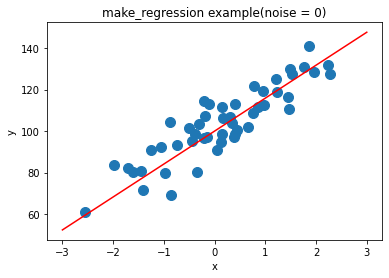

In [49]:
y0 = w*xx + 100
plt.plot(xx, y0, "r-")
plt.scatter(X,y,s=100)
plt.xlabel("x")
plt.ylabel('y')
plt.title("make_regression example(noise = 0)")
plt.show()

ex6) n_features 즉, 독립 변수가 2개인 표본 데이터를 생성하여 스캐터 플롯을 그리면 다음과 같다. 종속 변수 값은 점의 명암으로 표시하였다

In [51]:
import matplotlib as mpl

/home/newdrone18/.local/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46160 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/newdrone18/.local/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46021 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/newdrone18/.local/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47549 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/newdrone18/.local/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48320 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/newdrone18/.local/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/newdrone18/.local/lib/python3.6/site-packages/matplotlib/backends/backend_

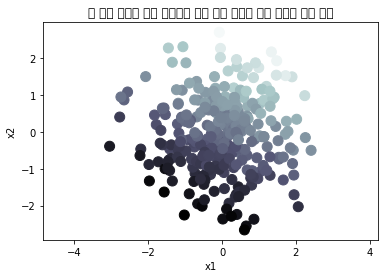

In [54]:
X,y,w = make_regression( n_samples=300, n_features=2, noise=10, coef=True, random_state =0)
# s = marker size, c = marker color
plt.scatter(X[:,0], X[:,1],c=y, s=100, cmap=mpl.cm.bone)
plt.xlabel('x1')
plt.ylabel("x2")
plt.axis("equal")
plt.title("두 독립 변수가 서로 독립이고 둘다 종속 변수와 상관 관계가 있는 경우")
plt.show()

ex7) 2차원의 독립 변수 중 실제로 종속 변수에 영향을 미치는 독립 변수는 하나 뿐이라면 다음처럼 n_informative=1로 설정한다.

/home/newdrone18/.local/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51473 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/newdrone18/.local/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54616 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/newdrone18/.local/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45208 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/newdrone18/.local/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47564 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/newdrone18/.local/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51473 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/newdrone18/.local/lib/python3.6/site-packages/matplotlib/backends/backend_ag

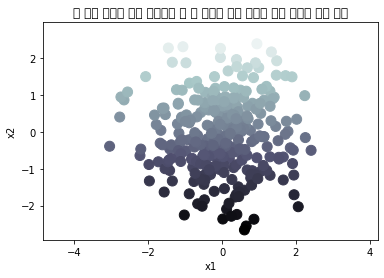

In [55]:
X, y, w = make_regression(
    n_samples=300, n_features=2, n_informative=1, noise=0, coef=True, random_state=0
)

plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap=mpl.cm.bone)
plt.xlabel("x1")
plt.ylabel("x2")
plt.axis("equal")
plt.title("두 독립 변수가 서로 독립이고 둘 중 하나만 종속 변수와 상관 관계가 있는 경우")
plt.show()

만약 두 독립 변수가 서로 독립이 아니고 상관관계를 가지는 경우에는 tail_strength 인수를 0에 가까운 작은 값으로 설정한다. 이 기능은 다중 공선성(multicolinearity)을 가지는 데이터를 시뮬레이션할 때 유용하다.

/home/newdrone18/.local/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50500 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/newdrone18/.local/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45772 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/newdrone18/.local/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50500 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/newdrone18/.local/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 45772 missing from current font.
  font.set_text(s, 0, flags=flags)


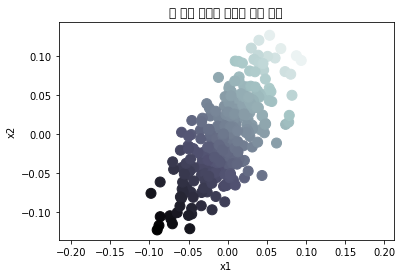

In [57]:
X, y, w = make_regression(
    n_samples=300, n_features=2, effective_rank=1, noise=0, coef=True, random_state=0,
    tail_strength=0
)

plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap=mpl.cm.bone)
plt.xlabel("x1")
plt.ylabel("x2")
plt.axis("equal")
plt.title("두 독립 변수가 독립이 아닌 경우")
plt.show()